# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dateutil.relativedelta import relativedelta
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, roc_curve

## 0.1 Functions

In [2]:
def descriptive_statistics(num):
    # Central Tendency - mean, median

    ct1 = pd.DataFrame(num.apply(np.mean)).T
    ct2 = pd.DataFrame(num.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, curtosis
    d1 = pd.DataFrame(num.apply(min)).T
    d2 = pd.DataFrame(num.apply(max)).T
    d3 = pd.DataFrame(num.apply(lambda x: x.max()-x.min())).T
    d4 = pd.DataFrame(num.apply(np.std)).T
    d5 = pd.DataFrame(num.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num.apply(lambda x: x.kurtosis())).T

    ctd = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()
    ctd.columns = ['features', 'mean','median','min','max','range','std','skew','kurtosis']
    return ctd

## 0.2 Import Data

In [3]:
df = pd.read_csv('../data/fraud_test.csv', index_col = 0)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.0 Data Description

In [4]:
df1 = df.copy()

## 1.1 Data Dimensions

In [5]:
print(f'O dataset possui {df1.shape[0]} linhas e {df1.shape[1]} colunas.')

O dataset possui 555719 linhas e 22 colunas.


## 1.2 Data Types

In [6]:
# Tipo de dados para cada variável
df1.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
# Quantas variávei de cada tipo
df1.dtypes.value_counts()

object     12
float64     6
int64       4
Name: count, dtype: int64

## 1.3 Null Values

In [8]:
# No NA values
df1.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## 1.4 Data Balance

In [9]:
# Imbalance dataset
df1.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## 1.5 Descriptive Statistics

In [10]:
# Estatísticas descritivas das Transações Legítimas
display(descriptive_statistics(df1.loc[df1.is_fraud == 0][['amt']]))

# Estatísticas descritivas das Transações Fraudulentas
display(descriptive_statistics(df1.loc[df1.is_fraud == 1][['amt']]))

,features,mean,median,min,max,range,std,skew,kurtosis
0,amt,67.614408,47.15,1.0,22768.11,22767.11,152.471793,40.196261,3641.057641


,features,mean,median,min,max,range,std,skew,kurtosis
0,amt,528.356494,371.94,1.78,1320.92,1319.14,392.656034,0.037961,-1.526826


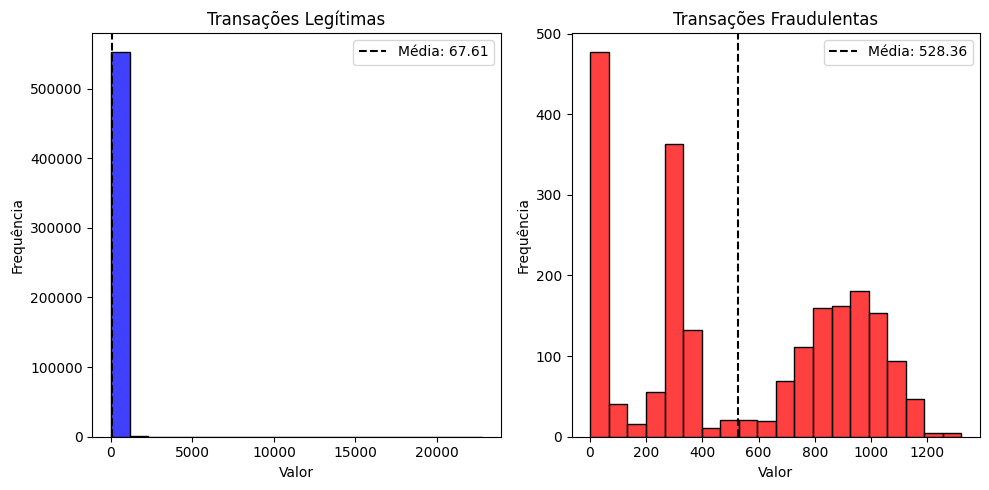

In [11]:
# Crie uma figura e eixos com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plotar o primeiro histograma (Transações Legítimas)
sns.histplot(data=df1.loc[df1.is_fraud == 0], x='amt', bins=20, color='blue', ax=axes[0])
axes[0].axvline(x=df1.loc[df1.is_fraud == 0, 'amt'].mean(), color='black', linestyle='--', label=f'Média: {df1.loc[df1.is_fraud == 0, 'amt'].mean():.2f}')
axes[0].set_title('Transações Legítimas')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frequência')
axes[0].legend()

# Plotar o segundo histograma (Transações Fraudulentas)
sns.histplot(data=df1.loc[df1.is_fraud == 1], x='amt', bins=20, color='red', ax=axes[1])
axes[1].axvline(x=df1.loc[df1.is_fraud == 1, 'amt'].mean(), color='black', linestyle='--', label=f'Média: {df1.loc[df1.is_fraud == 1, 'amt'].mean():.2f}')
axes[1].set_title('Transações Fraudulentas')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frequência')
axes[1].legend()


# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# 2.0 Data Cleaning

In [12]:
df2 = df1.copy()
# Exibir todas as colunas
pd.set_option('display.max_columns', None)

## 2.1. Change Data Type

In [13]:
# Converting to Datetime

# CRIAR FUNÇÃO
df2.trans_date_trans_time = pd.to_datetime(df2.trans_date_trans_time, dayfirst=True)
df2.dob = pd.to_datetime(df2.dob, dayfirst=True)
df2.unix_time = pd.to_datetime(df2.unix_time, unit = 's')

# 3.0 Feature Engineering

In [14]:
df3 = df2.copy()

In [15]:
# Variável de Idade
df3['age'] = df3['dob'].apply(lambda x: relativedelta(datetime.now(), x).years)

# Variáveis de Tempo
df3['month'] = df3.trans_date_trans_time.dt.month
df3['day'] = df3.trans_date_trans_time.dt.day
df3['weekday'] = df3.trans_date_trans_time.dt.weekday
df3['hour'] = df3.trans_date_trans_time.dt.hour
df3['minute'] = df3.trans_date_trans_time.dt.minute

In [16]:
# CRIAR FUNÇÃO

# Criando um df com as Cidades e suas maiores Populações encontradas
# No datafram originais, a mesma cidade aparece com populações diferetes 
cidades = df3.groupby('city')['city_pop'].max().reset_index()
city_fraud = df3.groupby('city')['is_fraud'].sum()
cidades = pd.merge(cidades, city_fraud, on = 'city')
cidades['fraud_per_pop'] = cidades.is_fraud / cidades.city_pop
cidades

,city,city_pop,is_fraud,fraud_per_pop
0,Achille,608,0,0.000000
1,Acworth,477,0,0.000000
2,Adams,3508,12,0.003421
3,Afton,2916,7,0.002401
4,Akron,272134,9,0.000033
...,...,...,...,...
844,Woods Cross,13983,0,0.000000
845,Woodville,3395,10,0.002946
846,Yellowstone National Park,369,0,0.000000
847,Zaleski,341,0,0.000000


In [17]:
# CRIAR FUNÇÕES

# JOIN DAS CIDADES COM A BASE DE TRANSAÇÕES
df3['city_pop'] = df3.apply(lambda x: cidades.loc[cidades['city'] == x['city'], 'city_pop'].values[0] if x['city'] in cidades['city'].values else x['city_pop'], axis=1)

# Join para pegar a proporção de frauders por habitante
df3 = pd.merge(df3, cidades[['city', 'fraud_per_pop']], on = 'city')

In [18]:
df3.trans_date_trans_time
# category
# amt
# gender
# lat
# long
#city_pop
# job (???)
# merch_lat
# merch_long
# age
# month
# day	weekday	hour	minute	fraud_per_pop

0        2020-06-21 12:14:00
1        2020-06-21 12:14:00
2        2020-06-21 12:14:00
3        2020-06-21 12:15:00
4        2020-06-21 12:15:00
                 ...        
555714   2020-12-31 23:59:00
555715   2020-12-31 23:59:00
555716   2020-12-31 23:59:00
555717   2020-12-31 23:59:00
555718   2020-12-31 23:59:00
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

# 4.0 EDA - Exploratory Data Analysis

In [19]:
df4 = df3.copy()

# 5.0 Feature Selection

In [20]:
df5 = df4.copy()

In [21]:
## TESTE DE SIGNIFICANCIA
selecao = ['category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'month','day','weekday','hour','minute','fraud_per_pop', 'is_fraud']

df5 = df5[selecao]

df5.head()


,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,age,month,day,weekday,hour,minute,fraud_per_pop,is_fraud
0,personal_care,2.86,M,33.9659,-80.9355,333497,33.986391,-81.200714,56,6,21,6,12,14,0.000000,0
1,personal_care,29.84,F,40.3207,-110.4360,302,39.450498,-109.960431,34,6,21,6,12,14,0.000000,0
2,health_fitness,41.28,F,40.6729,-73.5365,34496,40.495810,-74.196111,53,6,21,6,12,14,0.000000,0
3,misc_pos,60.05,M,28.5697,-80.8191,54767,28.812398,-80.883061,36,6,21,6,12,15,0.000183,0
4,travel,3.19,M,44.2529,-85.0170,1126,44.959148,-85.884734,68,6,21,6,12,15,0.000000,0


# 6. Data Preparation

In [22]:
df6 = df5.copy()

X = df6.drop('is_fraud', axis=1).copy()
y = df6['is_fraud']

# 6.1 Encoding

In [23]:
# Binarization
X['gender'] = X.apply(lambda x: 1 if x['gender'] == 'M' else 2, axis= 1)

# Encoding
X = pd.get_dummies(X)

## Data Balacing - Undersampling

In [108]:
from imblearn.under_sampling import RandomUnderSampler

# Criar uma instância de RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Tamanho do Dataset
print('Tamanho do Dataset:', y.shape[0])
print('Tamanho de 0:', y.value_counts()[0])
print('Tamanho de 1:', y.value_counts()[1])

# Aplicar undersampling aos dados
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Tamanho do Dataset
print('Tamanho do Dataset Resampled:', y_resampled.shape[0])
print('Tamanho de 0:', y_resampled.value_counts()[0])
print('Tamanho de 1:', y_resampled.value_counts()[1])

Tamanho do Dataset: 555719
Tamanho de 0: 553574
Tamanho de 1: 2145
Tamanho do Dataset Resampled: 4290
Tamanho de 0: 2145
Tamanho de 1: 2145


## 6.2 Train Test Split

In [25]:
X_train, X_test, y_train, y_test =  train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state= 42)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3432, 28)
y_train (3432,)
X_test (858, 28)
y_test (858,)


## 6.3 Normalization

In [109]:
# Normalization Definition 
ss = StandardScaler()
X_train[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']] = ss.fit_transform(X = X_train[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']])
X_test[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']] = ss.fit_transform(X = X_test[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']])
X_resampled[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']] = ss.fit_transform(X = X_resampled[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']])



# 7.0 Machine Learning Modelling

In [27]:
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
def overfitting_eval(train_scores, test_scores, threshold):
    for i, (train_score, test_score) in enumerate(zip(train_scores, test_scores)):
        if (train_score - test_score) >= threshold:
            print(f"Fold {i+1}: Potencial overfitting: pontuação de treinamento superior ({train_score.round(2)}) à pontuação de teste ({test_score.round(2)}), num threshold de {threshold}.")
        else:
            print(f"Fold {i+1}: No sign of overfitting")

def plot_cv_performance(scores, num_folds):
    test_scores = scores['test_score']
    # Plotar os resultados da validação cruzada
    plt.figure(figsize=(5, 3))
    plt.plot(np.arange(1, num_folds + 1), test_scores, marker='o', linestyle='-')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Cross-Validation Performance')
    plt.grid(True)
    plt.show()

## 7.1 K-NN Classifier

In [29]:
# Model Definition
knn = KNeighborsClassifier()
# Cross-Validation
knn_cv = cross_validate(knn, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
# Overfitting evaluation
overfitting_eval(knn_cv['train_score'] , knn_cv['test_score'], 0.2)
# Model training
knn.fit(X_resampled, y_resampled)
# Model prediction
y_hat = knn.predict(X_resampled)
# Model performance
print('F1-score:', f1_score(y_resampled, y_hat))

Fold 1: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.56), num threshold de 0.2.
Fold 2: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.69), num threshold de 0.2.
Fold 3: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.62), num threshold de 0.2.
Fold 4: Potencial overfitting: pontuação de treinamento superior (0.93) à pontuação de teste (0.72), num threshold de 0.2.
Fold 5: No sign of overfitting
Fold 6: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.63), num threshold de 0.2.
Fold 7: Potencial overfitting: pontuação de treinamento superior (0.93) à pontuação de teste (0.63), num threshold de 0.2.
Fold 8: No sign of overfitting
Fold 9: Potencial overfitting: pontuação de treinamento superior (0.92) à pontuação de teste (0.66), num threshold de 0.2.
Fold 10: Potencial overfitting: pontuação de treinamento superior (0.92) à po

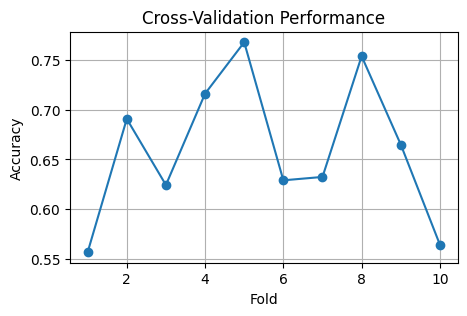

In [32]:
plot_cv_performance(knn_cv, 10)

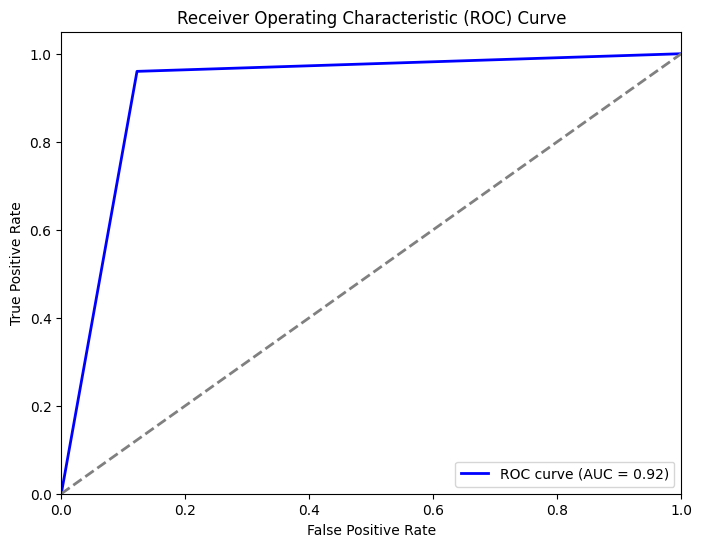

In [33]:
roc_curve(y_resampled, y_hat)

from sklearn.metrics import roc_curve, auc

# Calcule a taxa de verdadeiros positivos (TPR) e taxa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_resampled, y_hat)

# Calcule a área sob a curva ROC (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 7.2 Random Forest Classifier

In [34]:
# Model Definition
rfc = RandomForestClassifier(random_state = 42)
# Cross-Validation
rfc_cv = cross_validate(rfc, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
# Overfitting Evaluation
overfitting_eval(rfc_cv['train_score'] , rfc_cv['test_score'], 0.2)
# Model training
rfc.fit(X_resampled, y_resampled)
# Model prediction
y_hat = rfc.predict(X_resampled)
# Model performance
print('F1-score:', f1_score(y_resampled, y_hat))

Fold 1: No sign of overfitting
Fold 2: No sign of overfitting
Fold 3: No sign of overfitting
Fold 4: No sign of overfitting
Fold 5: No sign of overfitting
Fold 6: No sign of overfitting
Fold 7: No sign of overfitting
Fold 8: No sign of overfitting
Fold 9: No sign of overfitting
Fold 10: Potencial overfitting: pontuação de treinamento superior (1.0) à pontuação de teste (0.8), num threshold de 0.2.
F1-score: 1.0


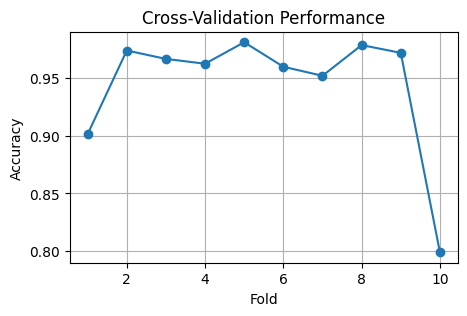

In [36]:
plot_cv_performance(rfc_cv, 10)

## 7.3 XGBoost Classifier

In [37]:
# Model Definition
xgb = GradientBoostingClassifier(random_state = 42)
# Cross-Validation
xgb_cv = cross_validate(xgb, X_resampled, y_resampled, scoring='f1', cv= 10, return_train_score = True)
# Overfitting Evaluation
overfitting_eval(xgb_cv['train_score'] , xgb_cv['test_score'], 0.2)
# Model training
xgb.fit(X_resampled, y_resampled)
# Model prediction
y_hat = xgb.predict(X_resampled)
# Model performance
print('F1-score:', f1_score(y_resampled, y_hat))

Fold 1: No sign of overfitting
Fold 2: No sign of overfitting
Fold 3: No sign of overfitting
Fold 4: No sign of overfitting
Fold 5: No sign of overfitting
Fold 6: No sign of overfitting
Fold 7: No sign of overfitting
Fold 8: No sign of overfitting
Fold 9: No sign of overfitting
Fold 10: No sign of overfitting
F1-score: 0.9881422924901185


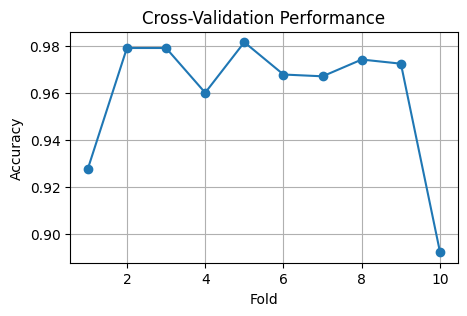

In [39]:
plot_cv_performance(xgb_cv, 10)

In [114]:
X_resampled[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']] = ss.inverse_transform(X = X_resampled[['amt', 'lat', 'long', 'city_pop','age', 'month', 'day', 'weekday', 'hour', 'minute']])

In [85]:
# Custo total das fraude
fraud_cost = X_resampled.loc[y_resampled == 1]['amt'].sum()
fraud_cost.round(2)

1133324.68

In [86]:
# Economia com o modelo
# Custo com o modelo
true_positive_indices = np.where((y_hat == 1) & (y_resampled == 1))[0]
true_positive_cost = X_resampled.iloc[true_positive_indices]['amt'].sum()
true_positive_cost

1132325.8

In [87]:
# Custo com o modelo
false_negative_indices = np.where((y_hat == 0) & (y_resampled == 1))[0]
false_negative_cost = X_resampled.iloc[false_negative_indices]['amt'].sum()
false_negative_cost.round(2)

998.88

In [88]:
((1132325.8-998.88) / 998.88) *100

113259.54268781036

In [89]:
(true_positive_cost - false_negative_cost) / false_negative_cost

1132.5954268781036

In [92]:
(true_positive_cost - false_negative_cost) / false_negative_cost

1132.5954268781036

In [103]:
def financial_impact_report(X_resampled, y_resampled, y_hat):
        """
        Gera um relatório de impacto financeiro com base nos resultados das previsões do modelo de classificação.

        Exibe mensagens com o impacto financeiro da aplicação do modelo de detecção de fraudes.
        """
        # Calcula o número total de transações fraudulentas e falsos positivos
        fraud_cost = X_resampled.loc[y_resampled == 1]['amt'].sum()
        true_positive_indices = np.where((y_hat == 1) & (y_resampled == 1))[0]
        true_positive_cost = X_resampled.iloc[true_positive_indices]['amt'].sum()
        false_negative_indices = np.where((y_hat == 0) & (y_resampled == 1))[0]
        false_negative_cost = X_resampled.iloc[false_negative_indices]['amt'].sum()

        # Exibe mensagens com o impacto financeiro da aplicação do modelo
        print(f"""
        Relatório de Impacto Financeiro:\n
        Sem o modelo de detecção de fraude, o custo com a cobertura de transações fraudulentas foi de ${fraud_cost:,.2f}.
        Se o modelo estivesse implementado, economizaríamos cerca de ${true_positive_cost:,.2f}, com cerca de ${false_negative_cost:,.2f} de custo devido a
        falhas (falsos negativos)
        Assim sendo, o retorno sobre o investimento (ROI) seria de ${((true_positive_cost - false_negative_cost) / false_negative_cost):,.2%}.""")

In [104]:
financial_impact_report(X_resampled, y_resampled, y_hat)


        Relatório de Impacto Financeiro:

        Sem o modelo de detecção de fraude, o custo com a cobertura de transações fraudulentas foi de $1,133,324.68.
        Se o modelo estivesse implementado, economizaríamos cerca de $1,132,325.80, com cerca de $998.88 de custo devido a
        falhas (falsos negativos)
        Assim sendo, o retorno sobre o investimento (ROI) seria de $113,259.54%.


In [ ]:
def financial_impact_report(X_resampled, y_resampled, y_hat):
        """
        Gera um relatório de impacto financeiro com base nos resultados das previsões do modelo de classificação.

        Exibe mensagens com o impacto financeiro da aplicação do modelo de detecção de fraudes.
        """
        # Calcula o número total de transações fraudulentas e falsos positivos
        fraud_cost = self.scaler.inverse_transform(self.X).loc[self.y == 1]['amt'].sum()
        false_positive_indices = np.where((self.y_predict == 1) & (self.y == 0))[0]
        false_positive_cost = self.X_raw.iloc[false_positive_indices]['amt'].sum()

        # Exibe mensagens com o impacto financeiro da aplicação do modelo
        print(f"""Relatório de Impacto Financeiro:\n
            
        Com a aplicação do modelo de detecção de fraude, seria economizado com a identificação de transações financeiras fraudulentas o total de ${fraud_cost:,.2f},
        mediante a um gasto, correspondente ao valor de transações financeiras falso positivas de ${false_positive_cost:,.2f}.
        Assim sendo, o retorno sobre o investimento (ROI) seria de ${(fraud_cost - false_positive_cost) / false_positive_cost:,.2f}.""")
